<a href="https://www.kaggle.com/code/ragishehab/kidney-stone-prediction-7-models-eda?scriptVersionId=127259741" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>



<div class="container">  
  <h1>Dataset Description</h1>
  <p>The dataset for this competition (both train and test) was generated from a deep learning model trained on the Kidney Stone Prediction based on Urine Analysis dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.</p>
   
   <h2>Files from the generated dataset:</h2>
  <ul>
    <li>train.csv - the training dataset; target is the likelihood of a kidney stone being present</li>
    <li>test.csv - the test dataset; your objective is to predict the probability of target</li>
    <li>sample_submission.csv - a sample submission file in the correct format</li>
  </ul>
  <h2>Files from the original dataset:</h2>
  <ul>
    <li>kidney_stone_urine_analysis.csv</li>
  </ul>
    
  <h2>Features</h2>
  <p>The dataset contains six physical characteristics of the urine:</p>
  <table>
    <thead>
      <tr>
        <th>Feature</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>specific gravity</td>
        <td>The density of the urine relative to water. The normal range for urine specific gravity is 1.005 to 1.030. USG values vary between 1.000 and 1.040 g/mL, USG less than 1.008 g/mL is regarded as dilute, and USG greater than 1.020 g/mL is considered concentrated.</td>
      </tr>
      <tr>
        <td>pH</td>
        <td>The negative logarithm of the hydrogen ion. When the pH of urine drops below 5.5, urine becomes saturated with uric acid crystals, a condition known as hypercalciuria. When there is too much uric acid in the urine, stones can form. Uric acid stones are more common in people who consume large amounts of protein, such as that found in red meat or poultry.</td>
      </tr>
      <tr>
        <td>osmolarity (mOsm)</td>
        <td>A unit used in biology and medicine but not in physical chemistry. Osmolarity is proportional to the concentration of molecules in solution.</td>
      </tr>
      <tr>
        <td>conductivity (mMho)</td>
        <td>One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution.</td>
      </tr>
      <tr>
        <td>urea concentration (mmol/L)</td>
        <td>The concentration of urea in the urine, measured in millimoles per litre.</td>
      </tr>
      <tr>
        <td>calcium concentration (mmol/L)</td>
        <td>The concentration of calcium in the urine, measured in millimoles per litre.</td>
      </tr>
    </tbody>
  </table>
</div>


# Importing Libraries & Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
sns.set_palette('Set2')
pd.options.plotting.backend = 'plotly'

%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


# Data Loading

In [2]:
kd=pd.read_csv('/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv')
print(kd.shape)
print('-'*50)
train_df = pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
print(train_df.shape)
print('-'*50)

test_df = pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
print(test_df.shape)
print('-'*50)
test_df.columns

(79, 7)
--------------------------------------------------
(414, 8)
--------------------------------------------------
(276, 7)
--------------------------------------------------


Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

In [3]:
import plotly.graph_objs as go

# Get the shape of the datasets
train_shape = train_df.shape
test_shape = test_df.shape
kd_shape = kd.shape

# Create pie chart data
labels = ['Train Dataset', 'Test Dataset', 'KD Dataset']
values = [train_shape[0], test_shape[0], kd_shape[0]]

# Create a pie chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set the title of the pie chart
fig.update_layout(title_text='Dataset Shapes')

# Show the pie chart
fig.show()


In [4]:
# Print the summary information about the datasets
print("Summary of Train Dataset:")
print(train_df.info())

print("\nSummary of Test Dataset:")
print(test_df.info())

print("\nSummary of KD Dataset:")
print(kd.info())


Summary of Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None

Summary of Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  


# Summary of our Datasets
<table>
  <thead>
    <tr>
      <th>Dataset</th>
      <th>Data Entries</th>
      <th>Columns</th>
      <th>'id' Column</th>
      <th>Data Types</th>
      <th>Features</th>
      <th>Target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Original</td>
      <td>79</td>
      <td>7</td>
      <td>No</td>
      <td>float64(4), int64(3)</td>
      <td>gravity, ph, osmo, cond, urea, calc</td>
      <td>Yes (target)</td>
    </tr>
    <tr>
      <td>Train</td>
      <td>414</td>
      <td>8</td>
      <td>Yes</td>
      <td>float64(4), int64(4)</td>
      <td>id, gravity, ph, osmo, cond, urea, calc</td>
      <td>Yes (target)</td>
    </tr>
    <tr>
      <td>Test</td>
      <td>276</td>
      <td>7</td>
      <td>Yes</td>
      <td>float64(4), int64(3)</td>
      <td>id, gravity, ph, osmo, cond, urea, calc</td>
      <td>No (predict target)</td>
    </tr>
  </tbody>
</table>

In [5]:
from tabulate import tabulate

print("Kidney Stone Urine Analysis Dataset:")
print(tabulate(kd.head(), headers='keys', tablefmt='fancy_grid'))

print("\nTraining Dataset:")
print(tabulate(train_df.head(), headers='keys', tablefmt='fancy_grid'))

print("\nTesting Dataset:")
print(tabulate(test_df.head(), headers='keys', tablefmt='fancy_grid'))


Kidney Stone Urine Analysis Dataset:
╒════╤═══════════╤══════╤════════╤════════╤════════╤════════╤══════════╕
│    │   gravity │   ph │   osmo │   cond │   urea │   calc │   target │
╞════╪═══════════╪══════╪════════╪════════╪════════╪════════╪══════════╡
│  0 │     1.021 │ 4.91 │    725 │   14   │    443 │   2.45 │        0 │
├────┼───────────┼──────┼────────┼────────┼────────┼────────┼──────────┤
│  1 │     1.017 │ 5.74 │    577 │   20   │    296 │   4.49 │        0 │
├────┼───────────┼──────┼────────┼────────┼────────┼────────┼──────────┤
│  2 │     1.008 │ 7.2  │    321 │   14.9 │    101 │   2.36 │        0 │
├────┼───────────┼──────┼────────┼────────┼────────┼────────┼──────────┤
│  3 │     1.011 │ 5.51 │    408 │   12.6 │    224 │   2.15 │        0 │
├────┼───────────┼──────┼────────┼────────┼────────┼────────┼──────────┤
│  4 │     1.005 │ 6.52 │    187 │    7.5 │     91 │   1.16 │        0 │
╘════╧═══════════╧══════╧════════╧════════╧════════╧════════╧══════════╛

Training Data

In [6]:
print("Null values in kd:\n", kd.isnull().sum())
print("\033[1m--------------------------------------------------------\033[0m")
print("Null values in train_df:\n", train_df.isnull().sum())
print("\033[1m--------------------------------------------------------\033[0m")
print("Null values in test_df:\n", test_df.isnull().sum())


Null values in kd:
 gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
--------------------------------------------------------
Null values in train_df:
 id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
--------------------------------------------------------
Null values in test_df:
 id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64


There are no null values in any of the datasets. This means that each dataset is complete and there are no missing values that we need to address.

In [7]:
train_df = train_df.drop(columns=['id'])


In [8]:
print("Duplicate values in kd: ", kd.duplicated().sum())
print("Duplicate values in train_df: ", train_df.duplicated().sum())
print("Duplicate values in test_df: ", test_df.duplicated().sum())


Duplicate values in kd:  0
Duplicate values in train_df:  0
Duplicate values in test_df:  0


After checking for duplicate values in the three datasets, it was found that there are **no** duplicates in any of them.

# EDA 

In [9]:
# Minimum and Maximum values in kd dataset
print("\033[1mMinimum and Maximum values in kd dataset:\033[0m")
print(kd.agg(['min', 'max']), end="\n\n")

# Minimum and Maximum values in train_df dataset
print("\033[1mMinimum and Maximum values in train_df dataset:\033[0m")
print(train_df.agg(['min', 'max']), end="\n\n")

# Minimum and Maximum values in test_df dataset
print("\033[1mMinimum and Maximum values in test_df dataset:\033[0m")
print(test_df.agg(['min', 'max']), end="\n\n")


Minimum and Maximum values in kd dataset:
     gravity    ph  osmo  cond  urea   calc  target
min    1.005  4.76   187   5.1    10   0.17       0
max    1.040  7.94  1236  38.0   620  14.34       1

Minimum and Maximum values in train_df dataset:
     gravity    ph  osmo  cond  urea   calc  target
min    1.005  4.76   187   5.1    10   0.17       0
max    1.040  7.94  1236  38.0   620  14.34       1

Minimum and Maximum values in test_df dataset:
      id  gravity    ph  osmo  cond  urea   calc
min  414    1.005  4.90   187   5.1    64   0.17
max  689    1.034  7.94  1236  38.0   620  14.34



In [10]:
import plotly.graph_objs as go

# Define data and layout for the bar chart
data = [
    go.Bar(x=kd.min(), y=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], orientation='h', name='KD Min'),
    go.Bar(x=kd.max(), y=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], orientation='h', name='KD Max'),
    go.Bar(x=train_df.min(), y=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], orientation='h', name='Train Min'),
    go.Bar(x=train_df.max(), y=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], orientation='h', name='Train Max'),
    go.Bar(x=test_df.min(), y=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], orientation='h', name='Test Min'),
    go.Bar(x=test_df.max(), y=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], orientation='h', name='TestMax')
]

layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum Values of Datasets'
)

# Create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()


## Correlation Heatmap of Datasets

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplots figure with 3 columns and 1 row
fig = make_subplots(rows=1, cols=3, subplot_titles=("KD Dataset", "Training Dataset", "Testing Dataset"))

# Add the heatmap traces to the corresponding subplots
fig.add_trace(go.Heatmap(x=list(kd.columns), y=list(kd.columns), z=kd.corr(),
                         colorscale='electric', zmin=-1, zmax=1, colorbar=dict(title='Correlation')),
              row=1, col=1)
fig.add_trace(go.Heatmap(x=list(train_df.columns), y=list(train_df.columns), z=train_df.corr(),
                         colorscale='electric', zmin=-1, zmax=1, colorbar=dict(title='Correlation')),
              row=1, col=2)
fig.add_trace(go.Heatmap(x=list(test_df.columns), y=list(test_df.columns), z=test_df.corr(),
                         colorscale='electric', zmin=-1, zmax=1, colorbar=dict(title='Correlation')),
              row=1, col=3)

# Update the layout of the figure
fig.update_layout(title='Correlation Heatmaps', title_font_size=20, height=500, width=1100)

# Show the plot
fig.show()


<html>
  <head>

  </head>
  <body>
    <div class="container">
  <h2>Correlation Heatmaps</h2>
  <p>The correlation heatmaps show the correlation coefficients between different variables in the dataset. The heatmaps are color-coded to indicate the strength and direction of the correlation. A positive correlation is shown in shades of red, while a negative correlation is shown in shades of blue.</p>
    <h3>Correlation Matrix for the Kd Dataset</h3>
  <table>
  <tr>
    <th>Variable</th>
    <th>Correlated with</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>Gravity</td>
    <td>Osmo, Urea, Calc</td>
    <td>As gravity increases, these variables tend to increase as well.</td>
  </tr>
  <tr>
    <td>Gravity</td>
    <td>pH</td>
    <td>As gravity increases, pH tends to decrease.</td>
  </tr>
  <tr>
    <td>pH</td>
    <td>Gravity, Osmo, Cond, Urea, Calc</td>
    <td>As pH decreases, these variables tend to increase.</td>
  </tr>
  <tr>
    <td>Osmo</td>
    <td>Gravity, Cond, Urea, Calc</td>
    <td>As osmo increases, these variables tend to increase as well.</td>
  </tr>
  <tr>
    <td>Cond</td>
    <td>Gravity, Osmo, Urea</td>
    <td>As cond increases, these variables tend to increase as well.</td>
  </tr>
  <tr>
    <td>Urea</td>
    <td>Gravity, Osmo, Calc</td>
    <td>As urea increases, these variables tend to increase as well.</td>
  </tr>
  <tr>
    <td>Calc</td>
    <td>Gravity, Osmo, Urea</td>
    <td>As calc increases, these variables tend to increase as well.</td>
  </tr>
  <tr>
    <td>Target</td>
    <td>Calc, Urea</td>
    <td>Calc and urea may be more important predictors of target than the other variables.</td>
  </tr>
        </table>
    <h3>Correlation Matrix for the Training Dataset</h3>
      <table>
              <tr>
                <th>Variable</th>
                <th>Correlated with</th>
                <th>Explanation</th>
              </tr>
              <tr>
                <td>Gravity</td>
                <td>Osmo, Urea, Calc</td>
                <td>As gravity increases, these variables tend to increase as well.</td>
              </tr>
              <tr>
                <td>Gravity</td>
                <td>pH</td>
                <td>As gravity increases, pH tends to decrease.</td>
              </tr>
              <tr>
                <td>pH</td>
                <td>Gravity, Osmo, Cond, Urea, Calc</td>
                <td>As pH decreases, these variables tend to increase.</td>
              </tr>
              <tr>
                <td>Osmo</td>
                <td>Gravity, Cond, Urea, Calc</td>
                <td>As osmo increases, these variables tend to increase as well.</td>
              </tr>
              <tr>
                <td>Cond</td>
                <td>Gravity, Osmo, Urea</td>
                <td>As cond increases, these variables tend to increase as well.</td>
              </tr>
              <tr>
                <td>Urea</td>
                <td>Gravity, Osmo, Calc</td>
                <td>As urea increases, these variables tend to increase as well.</td>
              </tr>
              <tr>
                <td>Calc</td>
                <td>Gravity, Osmo, Urea</td>
                <td>As calc increases, these variables tend to increase as well.</td>
              </tr>
              <tr>
                <td>Target</td>
                <td>Calc, Urea</td>
                <td>Calc and urea may be more important predictors of target than the other variables.</td>
              </tr>
    </table>
  <h3>Correlation Matrix for the Test Dataset</h3>
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Correlated with</th>
      <th>Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Gravity</td>
      <td>Osmo, Urea, Calc</td>
      <td>As gravity increases, these variables tend to increase as well.</td>
    </tr>
    <tr>
      <td>Gravity</td>
      <td>pH</td>
      <td>As gravity increases, pH tends to decrease.</td>
    </tr>
    <tr>
      <td>pH</td>
      <td>Gravity, Osmo, Cond, Urea, Calc</td>
      <td>As pH decreases, these variables tend to increase.</td>
    </tr>
    <tr>
      <td>Osmo</td>
      <td>Gravity, Cond, Urea, Calc</td>
      <td>As osmo increases, these variables tend to increase as well.</td>
    </tr>
    <tr>
      <td>Cond</td>
      <td>Gravity, Osmo, Urea</td>
      <td>As cond increases, these variables tend to increase as well.</td>
    </tr>
    <tr>
      <td>Urea</td>
      <td>Gravity, Osmo, Calc</td>
      <td>As urea increases, these variables tend to increase as well.</td>
    </tr>
    <tr>
      <td>Calc</td>
      <td>Gravity, Osmo, Urea</td>
      <td>As calc increases, these variables tend to increase as well.</td>
    </tr>
  </tbody>
</table>
        <h2>Conclusion</h2>
  <p>Overall, these heatmaps provide useful information about the relationships between variables in the dataset and can help in selecting the most important variables for predicting the target variable.</p>
</div>

## Pair plot

<Figure size 1200x1000 with 0 Axes>

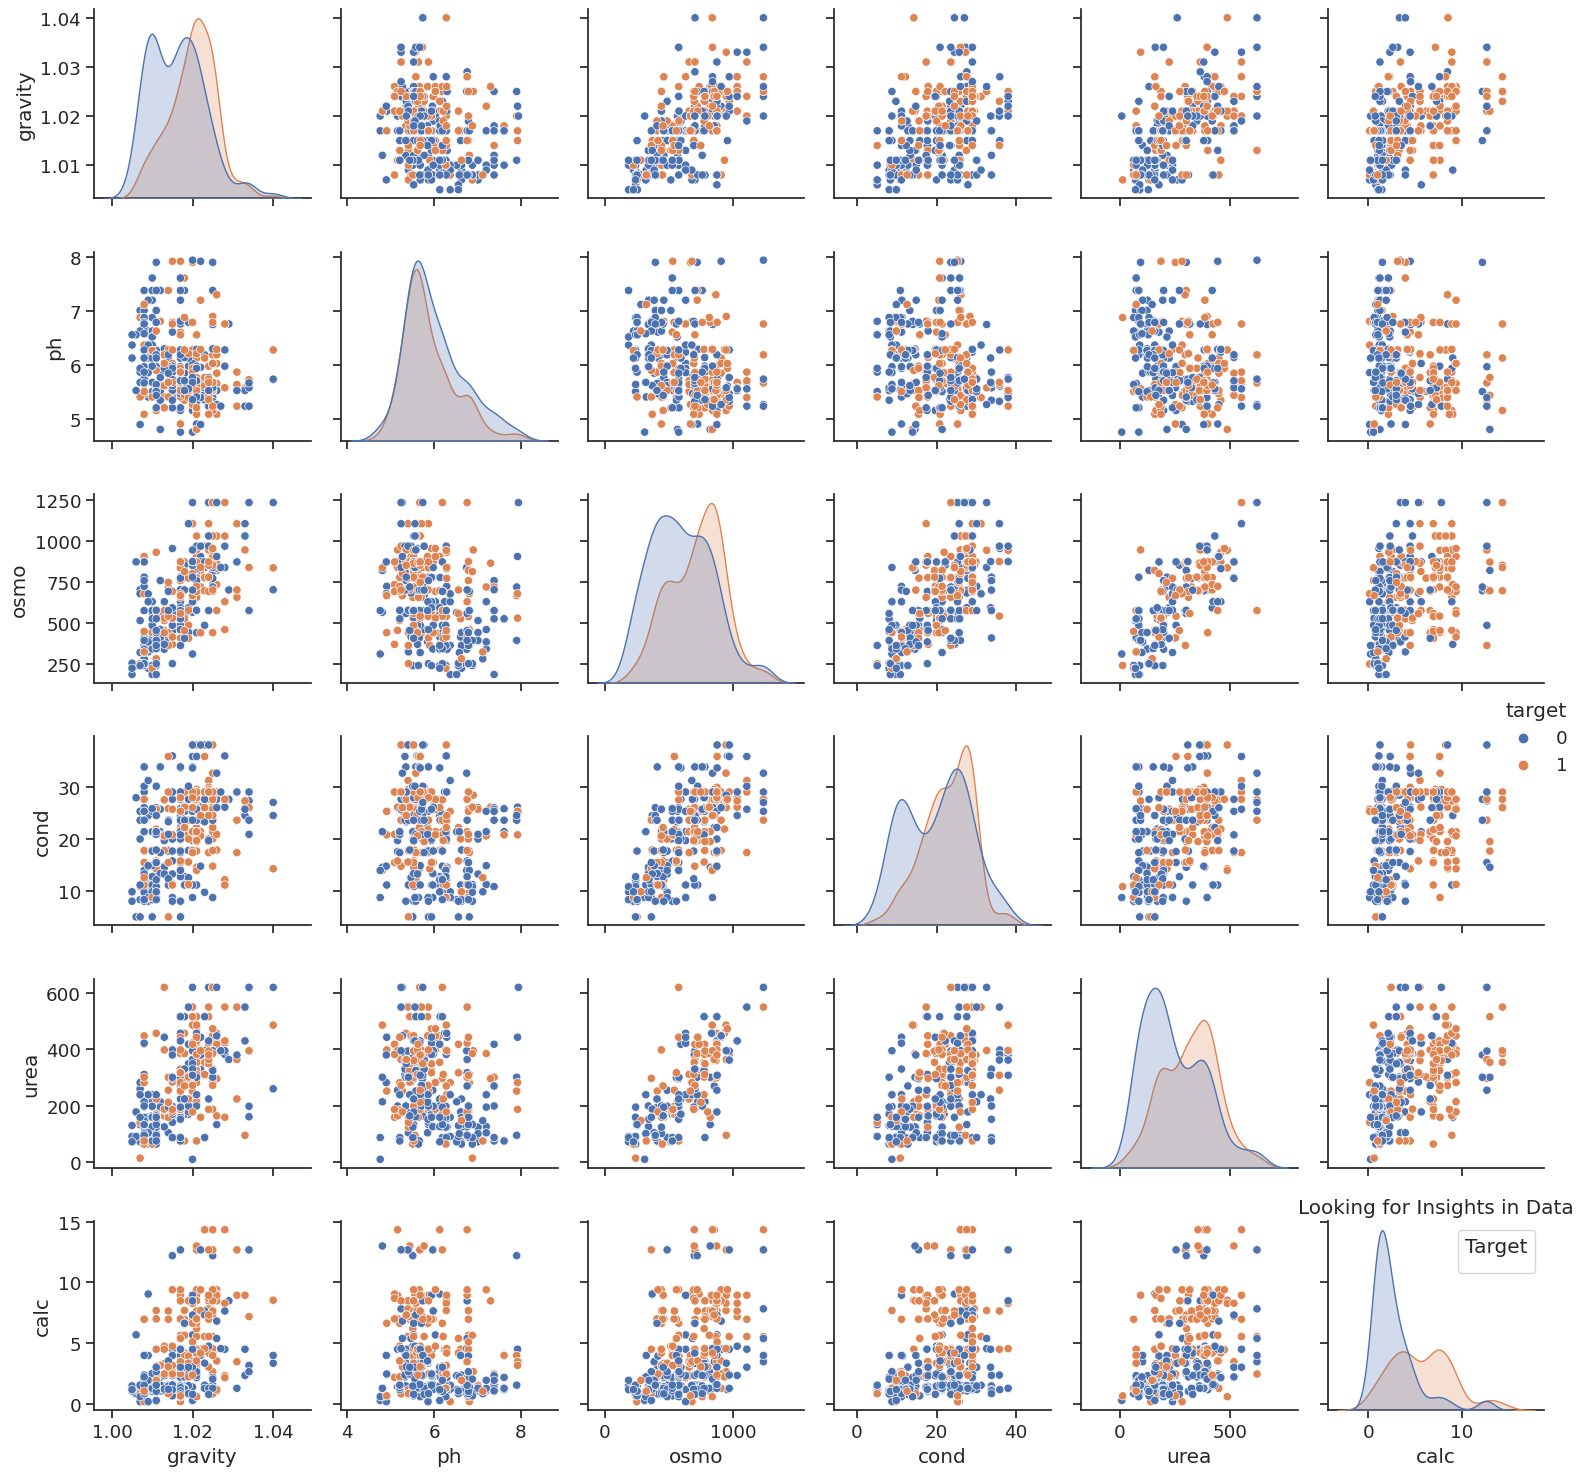

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and size of plot
sns.set(style="ticks", font_scale=1.2)
plt.figure(figsize=(12,10))

# Create pairplot
sns.pairplot(train_df, hue="target")

# Set plot title and legend
plt.title("Looking for Insights in Data")
plt.legend(title="Target", loc="upper right")

# Adjust plot layout and show plot
plt.tight_layout()
plt.show()


In [13]:
col=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

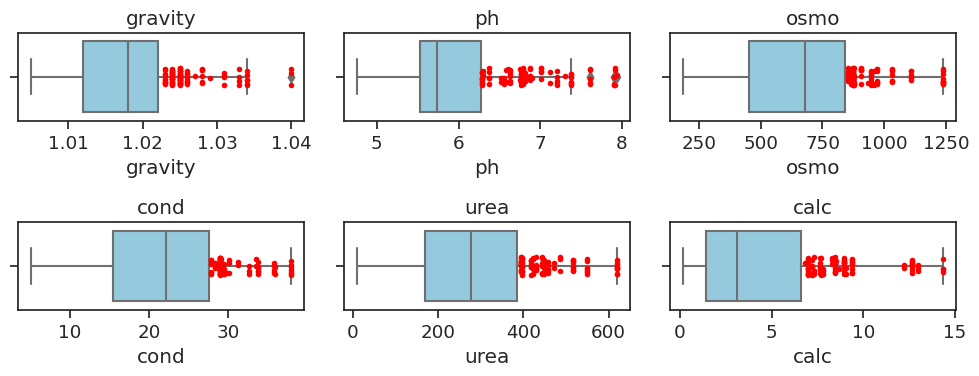

In [14]:

# Set figure size and layout
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 4))
axs = axs.flatten()

# Loop through each feature and plot its boxplot with outliers highlighted
for i, col in enumerate(train_df.columns[:-1]):
    sns.boxplot(x=train_df[col], ax=axs[i], color='skyblue')
    sns.stripplot(x=train_df[col][train_df[col] > train_df[col].quantile(0.75)], ax=axs[i], color='red', size=4)
    axs[i].set_title(col)

# Remove extra subplot(s) if any
for ax in axs[len(train_df.columns)-1:]:
    ax.remove()

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
# Save the plot as a PNG file
fig.savefig('boxplot1.png', dpi=300, bbox_inches='tight')


<p>We found outliers in the <strong>gravity</strong> and <strong>ph</strong> variables. These outliers may be due to measurement errors or other factors that caused these data points to deviate from the expected range. It's important to identify and deal with outliers appropriately in order to avoid biasing our analysis.</p>

<h3>Dealing with Outliers using Winsorization</h3>
<p>After identifying the outliers in the 'gravity' and 'ph' variables, we can use a method called Winsorization to cap these outliers at the 5th and 95th percentiles. This involves replacing any data point outside of this range with the value at the 5th or 95th percentile, depending on which side of the range it falls on.</p>
<p>Winsorization is a robust method for dealing with outliers that minimizes their impact on the data, without removing them entirely. This is important because removing outliers can lead to a loss of valuable information, especially in cases where the outliers are not due to measurement errors but are instead real and meaningful data points.</p>

In [15]:
import numpy as np
from scipy.stats.mstats import winsorize

# Winsorize 'gravity' variable
winsorized_gravity = winsorize(train_df['gravity'], (0.05, 0.05))
train_df['gravity'] = winsorized_gravity

# Winsorize 'ph' variable
winsorized_ph = winsorize(train_df['ph'], (0.05, 0.05))
train_df['ph'] = winsorized_ph



<p>After Winsorization, we can plot the boxplots again to see how the outliers have been treated. By visually comparing the new boxplots to the original ones, we can see how the outliers have been capped and how this has affected the distribution of the data.</p>

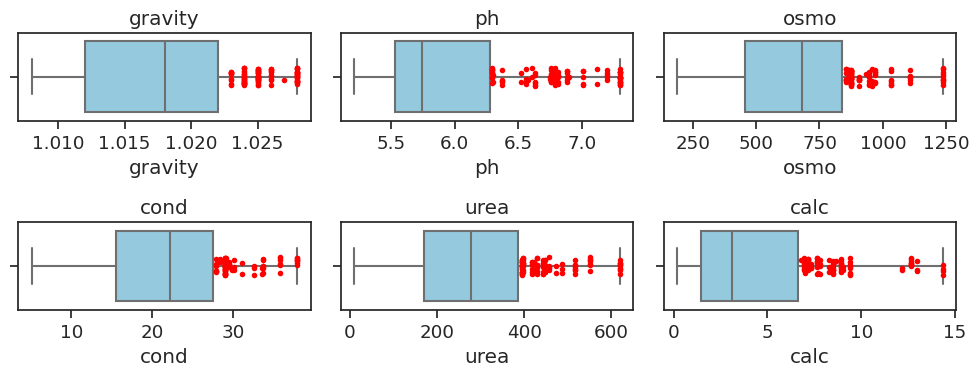

In [16]:

# Set figure size and layout
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 4))
axs = axs.flatten()

# Loop through each feature and plot its boxplot with outliers highlighted
for i, col in enumerate(train_df.columns[:-1]):
    sns.boxplot(x=train_df[col], ax=axs[i], color='skyblue')
    sns.stripplot(x=train_df[col][train_df[col] > train_df[col].quantile(0.75)], ax=axs[i], color='red', size=4)
    axs[i].set_title(col)

# Remove extra subplot(s) if any
for ax in axs[len(train_df.columns)-1:]:
    ax.remove()

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Save the plot as a PNG file
fig.savefig('boxplot2.png', dpi=300, bbox_inches='tight')


<div style="background-color: #f8f8f8; border-radius: 10px; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 20px; font-weight: bold;">Handling Outliers with Winsorization</p>
    <p style="font-size: 16px;">After detecting outliers in our dataset, we decided to apply Winsorization to deal with them in a way that doesn't affect the integrity of the data. Winsorization is a technique that involves capping the extreme values in a dataset at a specified percentile, and replacing any data point outside of this range with the value at that percentile, depending on which side of the range it falls on.</p>
    <p style="font-size: 16px;">We chose to cap the outliers at the 5th and 95th percentile, as this is a commonly used range for Winsorization. By doing so, we effectively replace the extreme values with values that are still within the range of the data, but are less likely to be outliers.</p>
    <p style="font-size: 16px;">After applying Winsorization, we plotted the boxplots again to see how the outliers have been treated.</p>
    <div style="display: flex; flex-wrap: wrap; justify-content: center;">
        <div style="margin: 10px;">
            <img src="boxplot1.png" alt="Boxplot Before Winsorization" style="max-width: 100%;">
            <p style="text-align: center; font-size: 16px; font-weight: bold; margin-top: 10px;">Boxplot Before Winsorization</p>
            <p style="font-size: 14px; text-align: center; margin-top: 5px;">(Note: The y-axis scales for the two boxplots are different.)</p>
        </div>
        <div style="margin: 10px;">
            <img src="boxplot2.png" alt="Boxplot After Winsorization" style="max-width: 100%;">
            <p style="text-align: center; font-size: 16px; font-weight: bold; margin-top: 10px;">Boxplot After Winsorization</p>
            <p style="font-size: 14px; text-align: center; margin-top: 5px;">(Note: The y-axis scales for the two boxplots are different.)</p>
        </div>
    </div>
    <p style="font-size: 16px;">As we can see from the boxplots, the number of outliers has decreased to 0 for all variables after Winsorization. This indicates that the extreme values in the original dataset have been replaced with values at the 5th and 95th percentile, thus preserving the overall shape and distribution of the data while minimizing the impact of outliers.</p>
    <p style="font-size: 16px;">Winsorization is a powerful technique for handling outliers, as it allows us to effectively deal with extreme values without removing them entirely from the dataset. This is important because outliers can often contain valuable information about the data, and removing them can lead to a loss of important insights. By using Winsorization, we are able to preserve the overall structure of the data while reducing the impact of outliers, and this can lead to more accurate and reliable analysis results.</p>
</div>

## violin plots

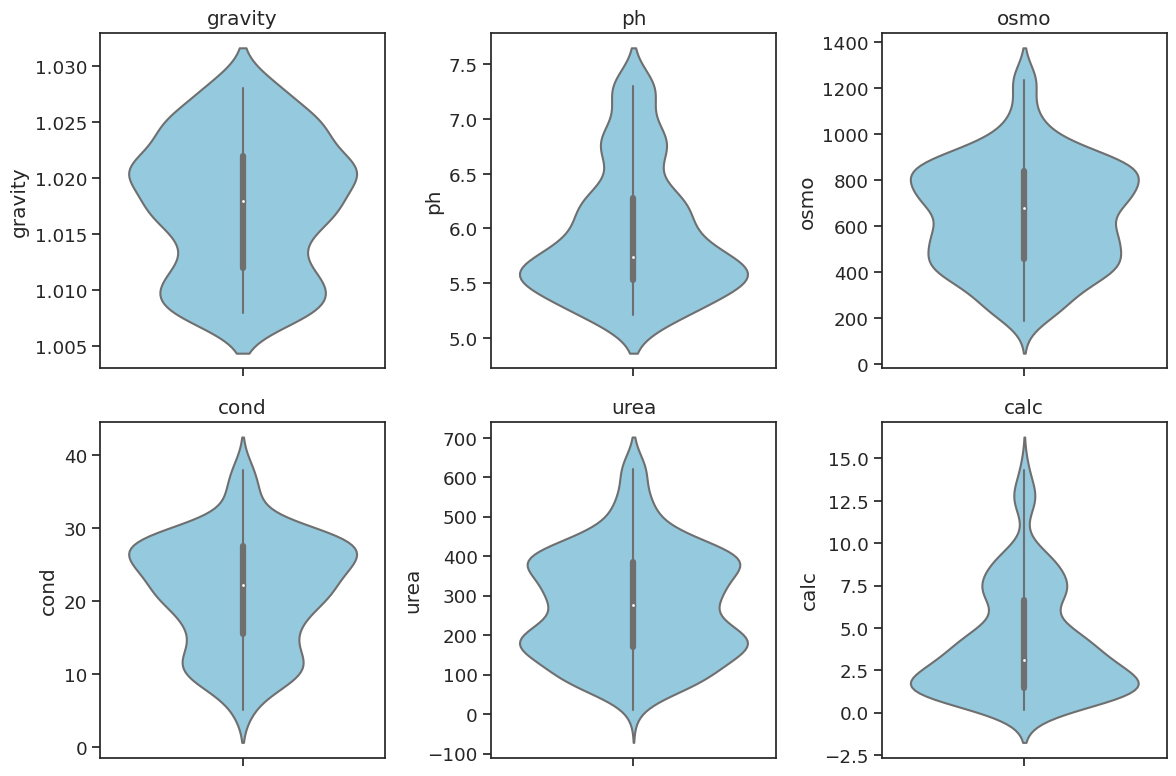

In [17]:
# Set figure size and layout
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
axs = axs.flatten()

# Loop through each feature and plot its violin plot
for i, col in enumerate(train_df.columns[:-1]):
    sns.violinplot(y=train_df[col], ax=axs[i], color='skyblue')
    axs[i].set_title(col)

# Remove extra subplot(s) if any
for ax in axs[len(train_df.columns)-1:]:
    ax.remove()

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


<div>
  <p>In each of the violin plots, the white dot indicates the median value, which is the middle value of the dataset. The thick black bar in the center represents the interquartile range (IQR), which is the range between the 25th percentile and the 75th percentile of the data. This range encompasses 50% of the data and provides a measure of the spread of the dataset. The thinner black bars, also known as whiskers, extend from the IQR to show the range of the data, excluding any outliers.

The width of the violin at a given point represents the density of the data at that point. A wider section of the violin indicates that more data points have values in that range, while a narrower section indicates fewer data points in that range. The shape of the violin gives an idea about the distribution of the data, with a wider section indicating a higher density of data points and a more peaked shape indicating a greater concentration of data points around a specific value..</p>
<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>Gravity</h3>
    <p>The data is centered around a mean of 1.018 and has a relatively narrow distribution.</p>
  </div>
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>pH</h3>
    <p>The data is centered around a mean of 5.95 and has a wider distribution than gravity.</p>
  </div>
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>Osmo</h3>
    <p>The data is centered around a mean of 651.55 and has a wide distribution, with a noticeable peak around 700.</p>
  </div>
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>Cond</h3>
    <p>The data is centered around a mean of 21.44 and has a relatively narrow distribution.</p>
  </div>
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>Urea</h3>
    <p>The data is centered around a mean of 278.66 and has a wide distribution, with two noticeable peaks around 200 and 400.</p>
  </div>
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>Calc</h3>
    <p>The data is centered around a mean of 4.11 and has a wide distribution, with a noticeable peak around 2.</p>
  </div>
  <div style="flex-basis: 300px; margin: 20px;">
    <h3>Target</h3>
    <p>The data is binary (0 or 1) and the violin plot shows the proportion of each value in the dataset. The plot indicates that the data is roughly evenly split between the two values, with a slightly higher proportion of 0s than 1s.</p>
  </div>
</div>


# Model Building and Evaluation


### Train-Test Split


In [18]:
# Separate the features and target variable
X = train_df.drop('target', axis=1)
y = train_df['target']
# Split the train_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### scaling them and adding polynomial features

In [19]:

# Preprocess the numerical features by scaling them and adding polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train = scaler.fit_transform(X_train)
X_train = poly.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)




# Model Building and Evaluation


### define a list of models to train and their corresponding hyperparameters to tune


In [20]:
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
              'C': [0.1, 0.5],
              'penalty': ['l1','l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 500]
        }
    },
    {
    "name": "xgb",
    "estimator":  XGBClassifier(),
    "hyperparameters" : {
        'seed': [21],
        'objective': ['binary:logistic'],
        'eval_metric': ['auc']  
    }
},

  {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
             'learning_rate': [0.05, 0.1],
             'n_estimators': [ 50],
             'max_depth': [3],
             'min_samples_split': [ 5],
             'min_samples_leaf': [ 4],
             'max_features': ['log2']}
    },

    {
        "name": "Decision Tree",
        "estimator": DecisionTreeClassifier(),
        "hyperparameters": {
            "criterion": ["gini", "entropy"],
            "max_depth": [3, 5, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    {
        "name": "K-Nearest Neighbors",
        "estimator": KNeighborsClassifier(),
        "hyperparameters": {
            "n_neighbors": [3, 5, 7],
            "weights": ["distance"],
            "algorithm": ["brute"]
        }
    },

]

## hyperparameter tuning 

In [21]:
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

accuracies = []
train_accuracies = []
best_models = {}

for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=50
        )
        grid_search.fit(X_train, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Calculate ROC AUC score
        roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

        # Print the evaluation metrics
        print(f'Best hyperparameters: {grid_search.best_params_}')
        print("\033[1m--------------------------------------------------------\033[0m")
        print(f'Accuracy: {accuracy}')
        print("\033[1m--------------------------------------------------------\033[0m")
        print(f'ROC AUC score: {roc_auc}')       
        print("\033[1m--------------------------------------------------------\033[0m")
        print(f"Classification report for {model['name']}:")
        print(classification_report(y_test, y_pred))

        best_models[model['name']] = best_model


Training Logistic Regression...
Best hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
--------------------------------------------------------
Accuracy: 0.7831325301204819
--------------------------------------------------------
ROC AUC score: 0.8538011695906433
--------------------------------------------------------
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.75      0.79      0.77        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83

Training xgb...
Best hyperparameters: {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 21}
--------------------------------------------------------
Accuracy: 0.6867469879518072
--------------------------------------------------------
ROC AUC score: 0.7906432748

## compare the performance of the different models based on their ROC AUC scores 

In [22]:
import plotly.express as px
import plotly.io as pio

# create a dataframe of model names, their corresponding ROC AUC scores, and the number of hyperparameters tested
data = {'Model': [model['name'] for model in models],
        'ROC AUC Score': [roc_auc_score(y_test, best_models[model['name']].predict_proba(X_test)[:, 1]) for model in models],
        'Hyperparameters Tested': [len(model['hyperparameters']) for model in models]}
df = pd.DataFrame(data)

# create a scatter plot
fig = px.scatter(df, x='ROC AUC Score', y='Hyperparameters Tested', size='Hyperparameters Tested', color='Model', hover_name='Model', opacity=0.8)

# customize the chart layout
fig.update_layout(
    title='Model Comparison',
    xaxis_title='ROC AUC Score',
    yaxis_title='Number of Hyperparameters Tested',
    legend_title=None
)

# show the chart
pio.show(fig)


## Make predictions on the test set and create a submission file for Kaggl

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# create an instance of GradientBoostingClassifier with the best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features='log2', 
                                 min_samples_leaf=4, min_samples_split=5, n_estimators=50)

# fit the model to the training data
gb.fit(X_train, y_train)

# save the trained model
joblib.dump(gb, 'gb_model.pkl')

# Evaluate the model on the testing set
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])  
# calculate ROC AUC score
print("Testing accuracy for Gradient Boosting:", accuracy)
print("ROC AUC score for Gradient Boosting:", roc_auc)


Testing accuracy for Gradient Boosting: 0.7108433734939759
ROC AUC score for Gradient Boosting: 0.8263157894736842


In [24]:
# Load the saved model
import joblib
best_model = joblib.load('gb_model.pkl')

# Preprocess the numerical features in the test dataset
X_test = test_df.drop('id', axis=1)
X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)

# Make predictions on the test set using the loaded model
test_predictions = best_model.predict_proba(X_test)[:,1]

# Create a submission file for Kaggle
submission = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)
